<a href="https://colab.research.google.com/github/EricEricEricJin/ECE539-Group-Project/blob/master/pred_series_mlp_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras

import os
import datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset

DIR_NAME = "/content/drive/My Drive/Colab Notebooks/ECE539_Project/"

def get_series_labels():
  series = []
  labels = []
  for dirname, _, filenames in os.walk(DIR_NAME + "pred_series"):
    if ("singing" in dirname or "speech" in dirname):
      for filename in filenames:
        for row in np.load(os.path.join(dirname, filename)):
          series.append(row)
          labels.append([0, 1] if "singing" in dirname else [1, 0])
  return series, labels

series, labels = get_series_labels()
series_ds = tf.data.Dataset.from_tensor_slices((series, labels))
print("Number of data", len(series_ds))

for _ in series_ds.take(1):
  input_size = len(_[0])
print("Input size", input_size)

Number of data 350
Input size 50


In [ ]:
# Train test splittion
batch_size = 8
series_ds_batched = series_ds.batch(batch_size)
train_ds, val_ds = keras.utils.split_dataset(series_ds_batched, left_size=0.8)
# train_ds = train_ds.batch(batch_size)
# val_ds = val_ds.batch(batch_size)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 32)                4352      
                                                                 
 dense_4 (Dense)             (None, 2)                 66        
                                                                 
Total params: 4418 (17.26 KB)
Trainable params: 4418 (17.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
35/35 [==============================] - 5s 95ms/step - loss: 0.6885 - accuracy: 0.6857 - val_loss: 0.6655 - val_accuracy: 0.7286
Epoch 2/100
35/35 [==============================] - 3s 100ms/step - loss: 0.5830 - accuracy: 0.8036 - val_loss: 0.6121 - val_accuracy: 0.7571
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 0.5202 - accuracy: 0.8071 - val_loss: 0.5574 - val_accurac

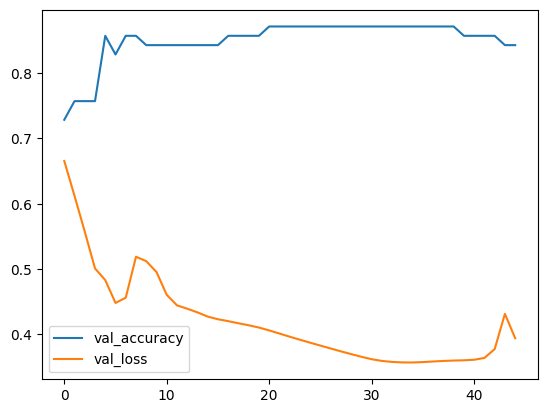

In [ ]:
# Develop a three-layer MLP with 50 inputs and 2 outputs

# Use MLP
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(50, input_dim=input_size, activation="ReLU"))
# model.add(keras.layers.Dense(60, activation="ReLU"))
# model.add(keras.layers.Dense(50, activation="ReLU"))
# model.add(keras.layers.Dense(2, activation="softmax"))
# model.compile(loss='binary_crossentropy', optimizer='adam',
#             metrics=['accuracy'])

# Use LSTM
model = keras.models.Sequential()
model.add(keras.layers.LSTM(32, input_shape=(input_size, 1)))
model.add(keras.layers.Dense(2, activation="softmax"))
model.compile(loss='binary_crossentropy', optimizer='adam',
            metrics='accuracy')
model.summary()
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
EPOCHS = 100

checkpoint_filepath = f"/content/drive/My Drive/Colab Notebooks/ECE539_Project/pred_series_lstm_weights"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlystop_callback = keras.callbacks.EarlyStopping(verbose=1, patience=10)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[earlystop_callback, checkpoint_callback],
)

plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [ ]:
# Deperated, use LSTM instead.


# model = keras.models.Sequential()
# model.add(keras.layers.Dense(50, input_dim=input_size, activation="ReLU"))
# model.add(keras.layers.Dense(60, activation="ReLU"))
# model.add(keras.layers.Dense(50, activation="ReLU"))
# model.add(keras.layers.Dense(2, activation="softmax"))
# model.summary()
# model.compile(loss='binary_crossentropy', optimizer='adam',
#             metrics=['accuracy'])
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=EPOCHS,
#     # callbacks=[earlystop_callback],
# )
# plt.plot(history.history["accuracy"], label="val_accuracy")
# plt.plot(history.history["val_loss"], label="val_loss")
# plt.legend()
# plt.show()